In [1]:
from tic_env import TictactoeEnv, OptimalPlayer
from performance_measures import M_opt, M_rand
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

## Q-Learning combined with epsilon-greedy policy. 

At each time $t$, state $s_t$ is the board position, action $a_t$ is one of the available positions on the board and reward $r_t$. <br>
The reward only non-zero when the game ends where you get $r_t = 1$ if you win the game, $r_t = 1$ if you lose, and $r_t=0$ if it is a draw.

Q-Learning has 3 hyper-parameters: 
- learning rate $\alpha$
- discount factor $\gamma$
- and exploration level $\epsilon$ 

For convenience, we fix the learning rate at alpha = 0.05 and the discount factor at $\gamma$ = 0.99. <br>
We initialize all the Q-values at 0. <br>
If you are curious, you can explore the effect of $\alpha$, $\gamma$ and initial Q-values for yourself. <br>

In [22]:
alpha = 0.05 # learning rate 
gamma = 0.99 # discount factor
epsilon = 0.1 # exploration rate

In [2]:
# Qtable[state][move]
class Qtable(dict):
    def __getitem__(self, key):
        return super().__getitem__(tuple(key.reshape(-1)))
    
    def __setitem__(self, key, value):
        super().__setitem__(tuple(key.reshape(-1)), value)

    def __missing__(self, key):
        arr = np.array(key).reshape(3, 3)
        zero = np.nonzero(arr == 0)
        ret = self[arr] = {k: 0 for k in zip(*zero)}
        return ret

### 2.1 Learning from experts

In this section, you will study whether Q-learning can learn to play Tic Tac Toe by playing against `Opt(`$\epsilon_{opt}$`)` for some $\epsilon_{opt} \in [0; 1]$. <br> 
To do so, implement the Q-learning algorithm. To check the algorithm, run a Q-learning agent, with a fixed and arbitrary $\epsilon_{opt} \in [0; 1)$ against `Opt(0.5)` for 20'000 games. <br> 
Switch the 1st player after every game.

In [27]:
env = TictactoeEnv()

Q_table = Qtable()

def epslion_greedy(state):
    Q_actions = Q_table[state]
    if np.random.random() < epsilon:
        actions = list(Q_actions.keys())
        if len(actions) == 1:
            return actions[0]
        return actions[np.random.randint(0, len(actions)-1)]
    else:
        return max(Q_actions, key=Q_actions.get)

num_episodes = 10000
rewards = []

opt_player = OptimalPlayer(0, player='O')
learning_player = 'X'

for itr in range(num_episodes):
    env.reset()
    state, end, _ = env.observe()

    # opt_player.player, learning_player = learning_player, opt_player.player

    if opt_player.player == 'X':
        move = opt_player.act(state)
        state, end, _ = env.step(move)

    while not end:
        move = epslion_greedy(state)
        state, end, _ = env.step(move)

        if env.current_player == opt_player.player and not end:
            state, end, _ = env.observe()
            move = opt_player.act(state)
            next_state, end, _ = env.step(move)
            reward = env.reward(player=learning_player)

            Q_table[state][move] = Q_table[state][move] + alpha * (reward + gamma * max(Q_table[next_state].values()) - Q_table[state][move])

        rewards.append(reward)
        state = next_state

        # env.render()
        # time.sleep(1)
        # clear_output(wait=True)
    
    env.reset()

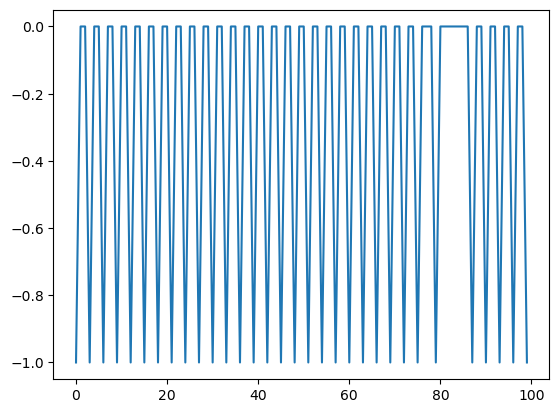

In [18]:
plt.plot(rewards[-100:])
plt.show()

In [20]:
repr(Q_table)

'{(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0): {(0, 0): 0, (0, 1): 0, (0, 2): 0, (1, 0): 0, (1, 1): 0, (1, 2): 0, (2, 0): 0, (2, 1): 0, (2, 2): 0}, (1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0): {(0, 1): 0, (0, 2): 0, (1, 0): 0, (1, 1): 0.0, (1, 2): 0, (2, 0): 0, (2, 1): 0, (2, 2): 0}, (1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0): {(0, 1): 0, (0, 2): 0, (1, 0): 0, (1, 2): 0, (2, 0): 0, (2, 1): 0, (2, 2): 0}, (1.0, 0.0, 1.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0): {(0, 1): 0.0, (1, 0): 0, (1, 2): 0, (2, 0): 0, (2, 1): 0, (2, 2): 0}, (1.0, -1.0, 1.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0): {(1, 0): 0, (1, 2): 0, (2, 0): 0, (2, 1): 0, (2, 2): 0}, (1.0, -1.0, 1.0, 1.0, -1.0, 0.0, 0.0, 0.0, 0.0): {(1, 2): 0, (2, 0): 0, (2, 1): -0.999997803173578, (2, 2): 0}, (1.0, -1.0, 1.0, 1.0, -1.0, 0.0, 0.0, -1.0, 0.0): {(1, 2): 0, (2, 0): 0, (2, 2): 0}, (1.0, 1.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0): {(0, 2): 0.0, (1, 0): 0, (1, 2): 0, (2, 0): 0, (2, 1): 0, (2, 2): 0}, (1.0, 1.0, -1.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.